# 1 Introdução 

Neste notebook, exploraremos diferentes técnicas de seleção de features para melhorar a performance dos modelos de Machine Learning. A seleção de features é um passo crucial no processo de engenharia de dados e pode ajudar a reduzir a complexidade do modelo, melhorar a interpretabilidade e aumentar a precisão.

- Objetivos
Compreender a Importância da Seleção de Features: Identificar as principais técnicas de seleção de features e como elas podem influenciar a performance do modelo.

- Aplicar Técnicas de Seleção de Features:
    - Filter Methods: Métodos que avaliam as features de forma independente do modelo, selecionando aquelas que têm a melhor performance estatística.
    - Wrapper Methods: Métodos que utilizam um modelo para avaliar a importância das features, selecionando subconjuntos de features baseados na performance do modelo.
    - Embedded Methods: Métodos que realizam a seleção de features durante o processo de treinamento do modelo, combinando a construção do modelo e a seleção de features.

- Comparar o Desempenho do Modelo: Avaliar como a seleção de features afeta a performance do modelo de Machine Learning utilizando um dataset de qualidade de vinho.

# 2 Importando Bibliotecas e Configurando Ambiente

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 3 Carregamento do Dataset

## 3.1 Descrição do dataset

Para este exemplo, utilizaremos o dataset "Wine Quality" disponível no UCI Machine Learning Repository. Este dataset contém informações sobre a qualidade de vinhos tintos da região do Douro, em Portugal, com base em diversas características químicas. É amplamente utilizado em estudos de machine learning para predição e classificação da qualidade do vinho.

- Principais Características do Dataset:
    - fixed acidity: Acidez fixa do vinho.
    - volatile acidity: Acidez volátil do vinho.
    - citric acid: Conteúdo de ácido cítrico no vinho.
    - residual sugar: Açúcar residual no vinho.
    - chlorides: Concentração de cloretos no vinho.
    - free sulfur dioxide: Quantidade de dióxido de enxofre livre no vinho.
    - total sulfur dioxide: Quantidade total de dióxido de enxofre no vinho.
    - density: Densidade do vinho.
    - pH: pH do vinho.
    - sulphates: Concentração de sulfatos no vinho.
    - alcohol: Percentual de álcool no vinho.
    - quality: Qualidade do vinho (variável alvo), avaliada em uma escala de 0 a 10.

- Importância das Variáveis:
    - Acidez Fixa e Volátil: Afetam o sabor do vinho. Altos níveis de acidez volátil podem ser indesejáveis.
    - Ácido Cítrico: Contribui para a frescura e sabor do vinho.
    - Açúcar Residual: Impacta o sabor doce do vinho; níveis mais altos podem indicar um vinho doce.
    - Cloretos: Níveis de sal no vinho; altos níveis podem indicar defeitos.
    - Dióxido de Enxofre Livre e Total: Usado como conservante; protege contra oxidação e bactérias.
    - Densidade: Relacionada ao conteúdo de açúcar e álcool.
    - pH: Mede a acidez; influenciado pela acidez fixa e volátil.
    - Sulfatos: Contribuem para a estabilidade microbiológica e frescura.
    - Álcool: Contribui para o corpo e sabor do vinho.
    - Qualidade: Avaliação sensorial do vinho pelos provadores, sendo a variável alvo.

- Fonte do Dataset
    - O dataset está originalmente disponível em: Wine Quality Data Set no UCI Machine Learning Repository
    - Para carregar o dataset em um DataFrame do pandas:

        import pandas as pd

        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

        df = pd.read_csv(url, delimiter=';')

In [2]:
# Carregando dataset
df = pd.read_csv("datasets/wine-quality-red.csv")

# Transformando a categoria
df['quality'] = df['quality'].apply(lambda x: 0 if x < 6 else 1)

# Visualizamos as primeiras linhas do dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# 4 Análise Exploratória Inicial

In [3]:
# Visualizando informações gerais sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# 5 Técnicas de Seleção de Features

## 5.1 Filter Methods

Usaremos o método SelectKBest com ANOVA F-statistic para selecionar as melhores features.

In [4]:
# Separando as features e o target
X = df.drop('quality', axis=1)
y = df['quality']

# Aplicando o SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)
X_KBest_np = selector.fit_transform(X, y)
X_KBest = X[X.columns[selector.get_support()]]

# Resultados das pontuações das features
scores = pd.DataFrame(selector.scores_, index=X.columns, columns=['Score'])
scores.sort_values(by='Score', ascending=False)

,Score
alcohol,372.194765
volatile acidity,184.022796
total sulfur dioxide,90.816016
sulphates,79.737680
citric acid,41.490123
density,41.479723
chlorides,19.378659
fixed acidity,14.573088
free sulfur dioxide,6.114110
pH,0.017014


## 5.2 Wrapper Methods

Utilizaremos o método RFE (Recursive Feature Elimination) com um classificador.

In [5]:
# Inicializando o classificador e o RFE
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=5 )  # Selecionar 5 melhores features
fit = rfe.fit(X, y)

c:\Users\filip\GitHub\FIAP-Feature-Engineering\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\filip\GitHub\FIAP-Feature-Engineering\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [6]:
# Resultados do RFE
rfe_features = pd.DataFrame({'Feature': X.columns, 'Rank': fit.ranking_})
rfe_features.sort_values(by='Rank', inplace=True)
print(rfe_features)

# Selecionar as 5 melhores features
best_features = rfe_features[rfe_features['Rank'] == 1]['Feature']
X_rfe = X[best_features]

                 Feature  Rank
1       volatile acidity     1
2            citric acid     1
4              chlorides     1
9              sulphates     1
10               alcohol     1
8                     pH     2
3         residual sugar     3
7                density     4
5    free sulfur dioxide     5
6   total sulfur dioxide     6
0          fixed acidity     7


## 5.3 Embedded Methods

Vamos usar o classificador RandomForestClassifier para selecionar as features importantes.

In [7]:
# Inicializando o classificador
model = RandomForestClassifier()
model.fit(X, y)

# Importância das features
importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
importance.sort_values(by='Importance', ascending=False)

# Selecionando as 5 features mais importantes
top_features = importance.head(5)['Feature']
X_embedded_features = X[top_features]

# 6 Comparativo entre Features Não e Selecionadas

## 6.1 Features não selecionadas

In [8]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo
model_raw = LogisticRegression()
model_raw.fit(X_train, y_train)

# Avaliando o modelo
y_pred_raw = model_raw.predict(X_test)
print("Dataset Bruto - Classification Report:\n", classification_report(y_test, y_pred_raw))
print("Dataset Bruto - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_raw))

Dataset Bruto - Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.71      0.70       213
           1       0.76      0.74      0.75       267

    accuracy                           0.73       480
   macro avg       0.72      0.73      0.72       480
weighted avg       0.73      0.73      0.73       480

Dataset Bruto - Confusion Matrix:
 [[152  61]
 [ 70 197]]


c:\Users\filip\GitHub\FIAP-Feature-Engineering\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 6.2 Features Selecionados - Select KBest

In [9]:
# Dividindo os dados em treino e teste
X_train_KBest, X_test_KBest, y_train, y_test = train_test_split(X_KBest, y, test_size=0.3, random_state=42)

# Treinando o modelo com dados tratados
model_KBest = LogisticRegression()
model_KBest.fit(X_train_KBest, y_train)

# Avaliando o modelo
y_pred_KBest = model_KBest.predict(X_test_KBest)
print("Dataset Tratado - Classification Report:\n", classification_report(y_test, y_pred_KBest))
print("Dataset Tratado - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_KBest))

Dataset Tratado - Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.72      0.69       213
           1       0.76      0.70      0.73       267

    accuracy                           0.71       480
   macro avg       0.71      0.71      0.71       480
weighted avg       0.72      0.71      0.71       480

Dataset Tratado - Confusion Matrix:
 [[154  59]
 [ 79 188]]


## 6.3 Features Selecionados - RFE

In [10]:
# Dividindo os dados em treino e teste
X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=42)

# Treinando o modelo com features selecionadas
model_rfe = LogisticRegression()
model_rfe.fit(X_train_rfe, y_train)

# Avaliando o modelo
y_pred_rfe = model_rfe.predict(X_test_rfe)
print("Dataset Tratado - Classification Report:\n", classification_report(y_test, y_pred_rfe))
print("Dataset Tratado - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rfe))

Dataset Tratado - Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.74      0.70       213
           1       0.77      0.70      0.74       267

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480

Dataset Tratado - Confusion Matrix:
 [[157  56]
 [ 79 188]]


## 6.4 Features Selecionados - RFE

In [11]:
# Dividindo os dados em treino e teste
X_train_embedded_features, X_test_embedded_features, y_train, y_test = train_test_split(X_embedded_features, y, test_size=0.3, random_state=42)

# Treinando o modelo com dados tratados
model_embedded_features = LogisticRegression()
model_embedded_features.fit(X_train_embedded_features, y_train)

# Avaliando o modelo
y_pred_embedded_features = model_embedded_features.predict(X_test_embedded_features)
print("Dataset Tratado - Classification Report:\n", classification_report(y_test, y_pred_embedded_features))
print("Dataset Tratado - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_embedded_features))

Dataset Tratado - Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.57      0.60       213
           1       0.68      0.73      0.71       267

    accuracy                           0.66       480
   macro avg       0.66      0.65      0.65       480
weighted avg       0.66      0.66      0.66       480

Dataset Tratado - Confusion Matrix:
 [[121  92]
 [ 71 196]]


# 7 Comparação Gráfica dos Resultados

In [12]:
# Curva ROC para comparação entre modelos
fpr_raw, tpr_raw, _ = roc_curve(y_test, y_pred_raw)
fpr_KBest, tpr_KBest, _ = roc_curve(y_test, y_pred_KBest)
fpr_rfe, tpr_rfe, _ = roc_curve(y_test, y_pred_rfe)
fpr_embedded_features, tpr_embedded_features, _ = roc_curve(y_test, y_pred_embedded_features)

# Calculando a AUC para cada modelo
auc_raw = roc_auc_score(y_test, y_pred_raw)
auc_KBest = roc_auc_score(y_test, y_pred_KBest)
auc_rfe = roc_auc_score(y_test, y_pred_rfe)
auc_embedded_features = roc_auc_score(y_test, y_pred_embedded_features)

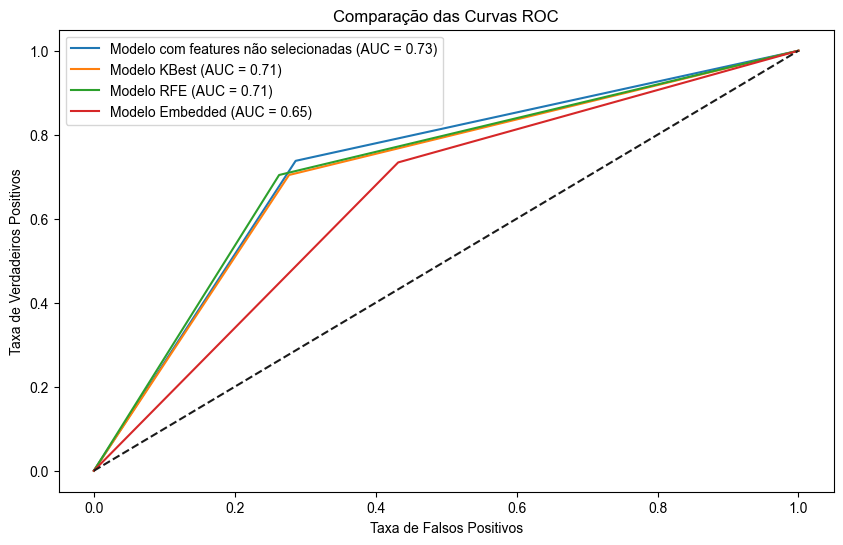

In [13]:
# Plotando as curvas ROC com AUC nas legendas
plt.figure(figsize=(10, 6))
plt.plot(fpr_raw, tpr_raw, label=f"Modelo com features não selecionadas (AUC = {auc_raw:.2f})")
plt.plot(fpr_KBest, tpr_KBest, label=f"Modelo KBest (AUC = {auc_KBest:.2f})")
plt.plot(fpr_rfe, tpr_rfe, label=f"Modelo RFE (AUC = {auc_KBest:.2f})")
plt.plot(fpr_embedded_features, tpr_embedded_features, label=f"Modelo Embedded (AUC = {auc_embedded_features:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal representando um modelo aleatório
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Comparação das Curvas ROC')
plt.legend()

# Configurando o estilo do seaborn para 'darkgrid'
sns.set(style="darkgrid")

plt.show()